In [38]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
sys.path.append(os.path.abspath("../scripts"))

In [40]:
from db_utils import connect_to_database, fetch_data, close_connection
from queries import query_telecom_data

In [41]:
# Connect to the database using parameters from the .env file
conn = connect_to_database()

Database connection successful!


In [42]:
query="SELECT * from xdr_data;"

In [43]:
# Fetch data using the query
if conn:
    telecom_data = fetch_data(conn, query)
    close_connection(conn)

# Display the first few rows of the data
if telecom_data is not None:
    print(telecom_data.head())


c:\Users\user\Projects\Business-Data-Analysis-for-TellCo\scripts\db_utils.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data fetched successfully!
Database connection closed!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                

In [44]:
query_handsets = """
SELECT 
    "Handset Type", 
    "Handset Manufacturer" 
FROM xdr_data;
"""

# Fetch data
conn = connect_to_database()
if conn:
    telecom_data = fetch_data(conn, query_handsets)
    close_connection(conn)

# Check the data
print(telecom_data.head())


Database connection successful!


c:\Users\user\Projects\Business-Data-Analysis-for-TellCo\scripts\db_utils.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data fetched successfully!
Database connection closed!
                  Handset Type Handset Manufacturer
0   Samsung Galaxy A5 Sm-A520F              Samsung
1  Samsung Galaxy J5 (Sm-J530)              Samsung
2     Samsung Galaxy A8 (2018)              Samsung
3                    undefined            undefined
4             Samsung Sm-G390F              Samsung


In [45]:
# Identify the top 10 handsets
top_10_handsets = telecom_data['Handset Type'].value_counts().head(10)

# Display the results
print("Top 10 Handsets:")
print(top_10_handsets)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6176\319638489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


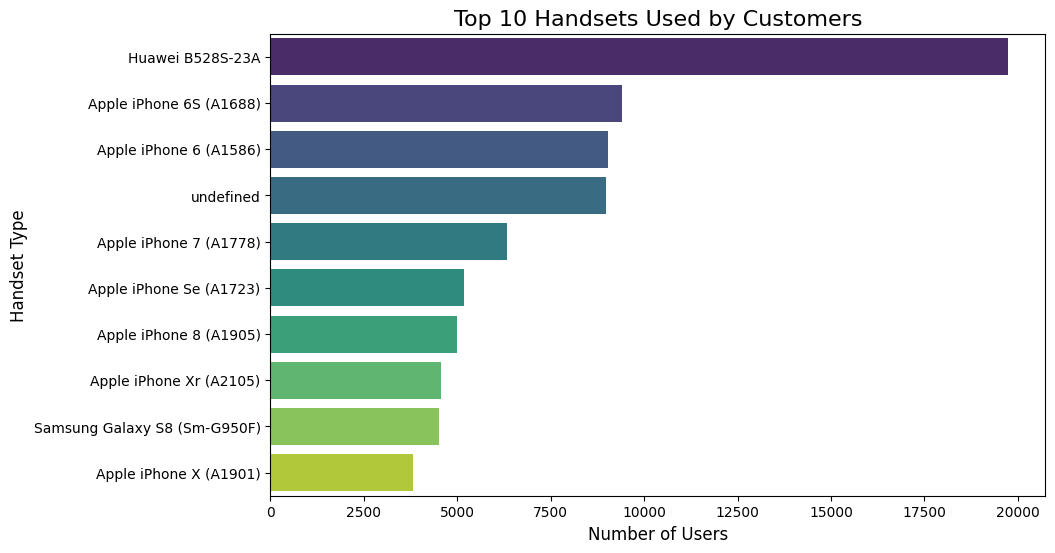

In [46]:
# Plotting top 10 handsets
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_handsets.values,
    y=top_10_handsets.index,
    palette='viridis'
)
plt.title("Top 10 Handsets Used by Customers", fontsize=16)
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Handset Type", fontsize=12)
plt.show()

In [47]:
# Identify the top 3 manufacturers
top_3_manufacturers = telecom_data['Handset Manufacturer'].value_counts().head(3)

# Display the results
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


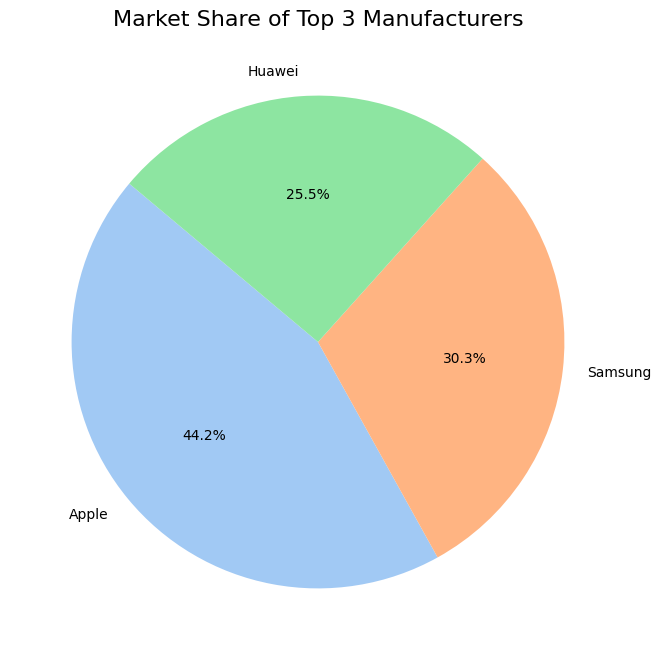

In [48]:
# Plotting top 3 manufacturers
plt.figure(figsize=(8, 8))
plt.pie(
    top_3_manufacturers.values,
    labels=top_3_manufacturers.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Market Share of Top 3 Manufacturers", fontsize=16)
plt.show()


In [49]:
# Get the top 3 manufacturers
top_manufacturer_names = top_3_manufacturers.index

# Loop through each manufacturer and find the top 5 handsets
for manufacturer in top_manufacturer_names:
    top_5_handsets = telecom_data[telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_5_handsets)



Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6176\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


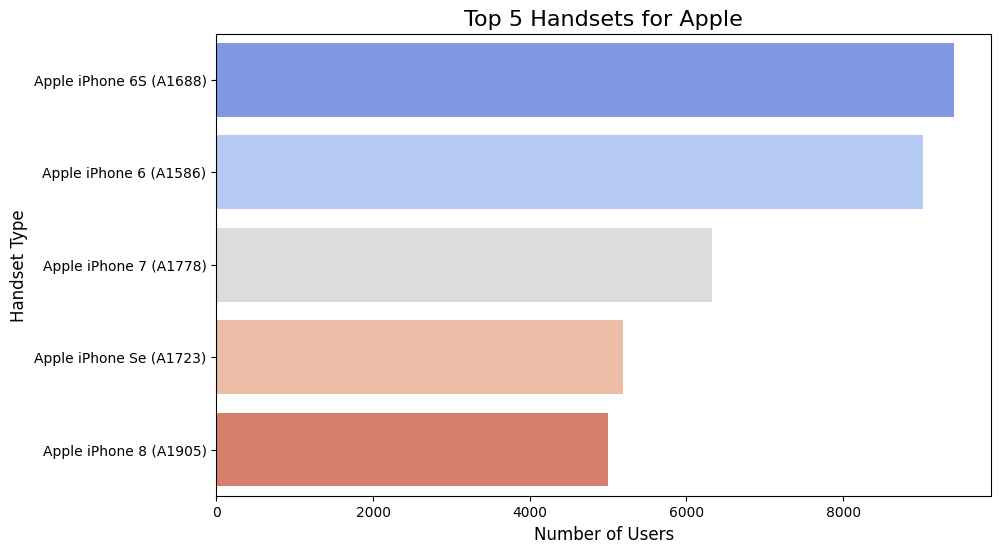

C:\Users\user\AppData\Local\Temp\ipykernel_6176\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


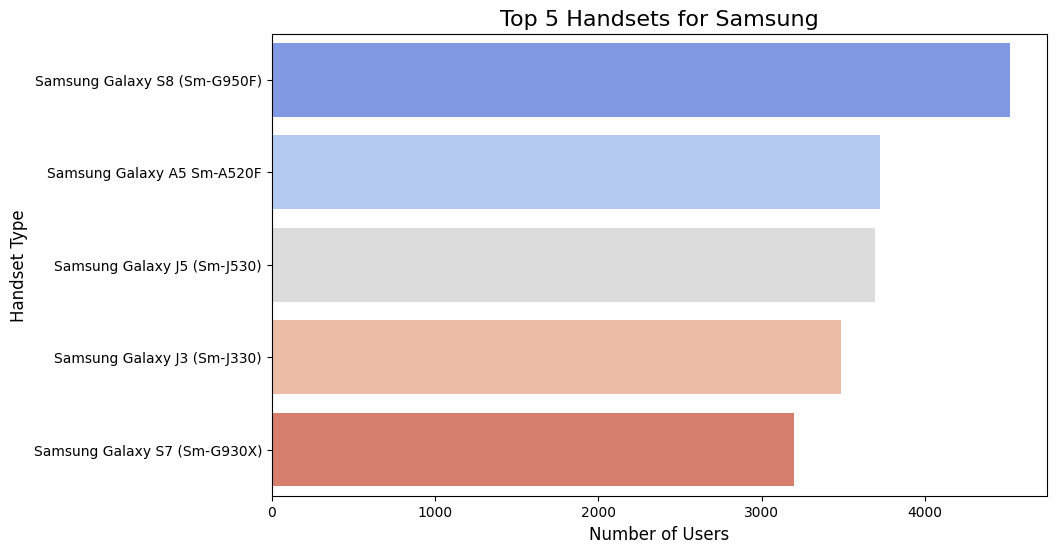

C:\Users\user\AppData\Local\Temp\ipykernel_6176\2556424692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


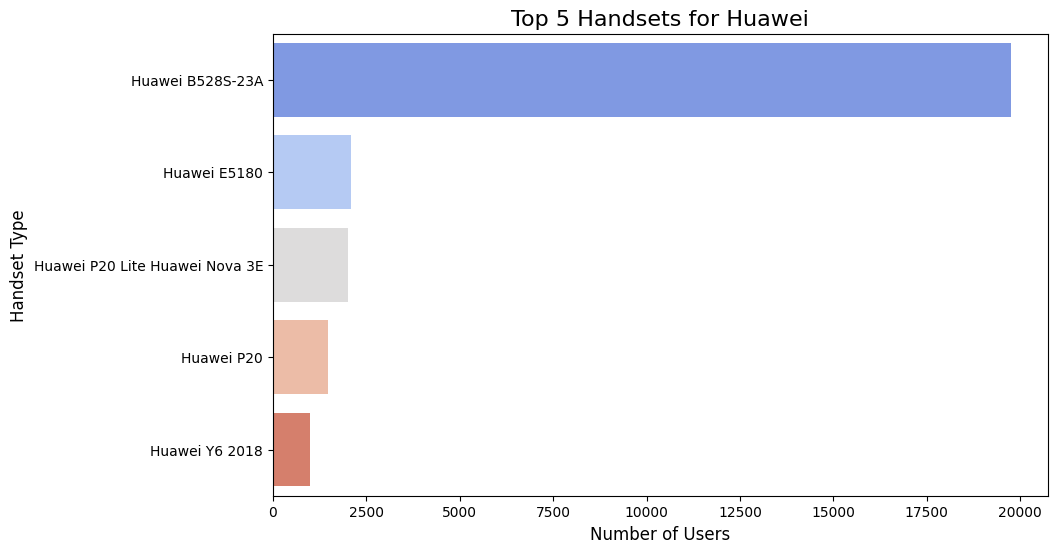

In [50]:
# Plotting top 5 handsets for each manufacturer
for manufacturer in top_manufacturer_names:
    top_5_handsets = telecom_data[telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_5_handsets.values,
        y=top_5_handsets.index,
        palette='coolwarm'
    )
    plt.title(f"Top 5 Handsets for {manufacturer}", fontsize=16)
    plt.xlabel("Number of Users", fontsize=12)
    plt.ylabel("Handset Type", fontsize=12)
    plt.show()


In [56]:
# Fetch data from the table
query = "SELECT * FROM xdr_data LIMIT 1;"  # Fetch one row to inspect schema
df = pd.read_sql_query(query, conn)

# Display column names
print("Column Names:", df.columns.tolist())

Column Names: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Soc

C:\Users\user\AppData\Local\Temp\ipykernel_6176\592944797.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [59]:
# Connect to the database
conn = connect_to_database()

# SQL query for aggregation
query = """
SELECT 
    "MSISDN/Number" AS user_id,
    COUNT(DISTINCT "Bearer Id") AS xdr_sessions,  -- Number of xDR sessions
    SUM("Dur. (ms)") AS total_session_duration_ms,  -- Total session duration
    SUM("Total DL (Bytes)") AS total_download_bytes,  -- Total download data
    SUM("Total UL (Bytes)") AS total_upload_bytes,  -- Total upload data
    SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS social_media_data_bytes,
    SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS google_data_bytes,
    SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS email_data_bytes,
    SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS youtube_data_bytes,
    SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS netflix_data_bytes,
    SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS gaming_data_bytes,
    SUM("Other DL (Bytes)" + "Other UL (Bytes)") AS other_data_bytes
FROM xdr_data
GROUP BY "MSISDN/Number";
"""

# Fetch the data
user_behavior = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the aggregated data
print(user_behavior.head())


Database connection successful!


C:\Users\user\AppData\Local\Temp\ipykernel_6176\2377421195.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_behavior = pd.read_sql_query(query, conn)


DatabaseError: Execution failed on sql '
SELECT 
    "MSISDN/Number" AS user_id,
    COUNT(DISTINCT "Bearer Id") AS xdr_sessions,  -- Number of xDR sessions
    SUM("Dur. (ms)") AS total_session_duration_ms,  -- Total session duration
    SUM("Total DL (Bytes)") AS total_download_bytes,  -- Total download data
    SUM("Total UL (Bytes)") AS total_upload_bytes,  -- Total upload data
    SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS social_media_data_bytes,
    SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS google_data_bytes,
    SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS email_data_bytes,
    SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS youtube_data_bytes,
    SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS netflix_data_bytes,
    SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS gaming_data_bytes,
    SUM("Other DL" + "Other UL") AS other_data_bytes
FROM xdr_data
GROUP BY "MSISDN/Number";
': column "Other DL" does not exist
LINE 14:     SUM("Other DL" + "Other UL") AS other_data_bytes
                 ^
